# Warmup

## 1. NumPy

In [126]:
# a. Import NumPy.
import numpy as np

a = np.full((2, 3), 4)
b = np.array([[1, 2, 3], [4, 5, 6]])
c = np.eye(2, 3)
d = a + b + c

# b. Think about which values are in the NumPy array 'd', then verify if you were correct.
a = np.array([[1,2,3,4,5],
              [5,4,3,2,1],
              [6,7,8,9,0],
              [0,9,8,7,6]])

# c. Sum the rows of a
row_sum = np.sum(a, axis=1)

# d. Get the transpose of a
a_transpose = a.T

## 2. Pandas

In [127]:
# a. Import pandas
import pandas as pd

# b. Read the file 'auto.csv'.
auto = pd.read_csv('auto.csv')
#print(auto)

# c. Remove all rows with 'mpg' lower than 16.
auto = auto[auto['mpg'] >= 16] # Keep rows with 'mpg' >= 16
#print(auto)

# d. Get the first 7 rows of the column 'weights' and 'acceleration'.
weights_acceleration = auto[['weight', 'acceleration']].head(7)
#print(weights_acceleration)

# e. Remove the rows in the 'horsepower' column that have the value '?' and convert the column to 'int' type instead of 'string'.
# Print the horsepower column rows that has the value '?' before and after the conversion.
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')  # Replace '?' with NA without inplace=True
auto = auto.dropna()

# f. Calculate the averages of every column except for the column 'name'.
auto_avg = auto.mean(numeric_only=True)
print(auto_avg)

mpg               25.747799
cylinders          4.908805
displacement     157.828616
horsepower        91.075472
weight          2694.971698
acceleration      16.147170
year              76.707547
origin             1.710692
dtype: float64


## 3. PyTorch

In [128]:
# a. Import pytorch
import torch

# b. Create two random matrices using PyTorch's (torch.rand) of size 3x3.
a = torch.rand(3, 3)
b = torch.rand(3, 3)
print('a:', a)
print('b:', b)

# c. Multiply the two matrices using PyTorch's matrix multiplication function (torch.matmul).
c = torch.matmul(a, b)
print('c:', c)

a: tensor([[0.6268, 0.0416, 0.6938],
        [0.2870, 0.4194, 0.9317],
        [0.2573, 0.4545, 0.6637]])
b: tensor([[0.0713, 0.3637, 0.2452],
        [0.7088, 0.1602, 0.3138],
        [0.4119, 0.0716, 0.5423]])
c: tensor([[0.3600, 0.2843, 0.5430],
        [0.7015, 0.2382, 0.7073],
        [0.6139, 0.2139, 0.5657]])


# Excerise 2

The overall idea of this exercise is to predict the fuel consumption of cars (measured in miles-per gallon, mpg) for various cars based on a linear regression model. The dataset is available at the course website (auto.csv)

## 1.
Load the auto.csv dataset again using the pandas.read function and remember to remove the missing values in the dataset, indicated by ‘?’, and then make sure the corresponding columns are casted to a numerical type.

In [129]:
auto = pd.read_csv('auto.csv')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto = auto.dropna()

# 2.
Inspect the data. Plot the relationships between the different variables and mpg. Use for example the matplotlib.pyplot scatter plot. Do you already suspect what features might be helpful to regress the consumption? Save the graph.

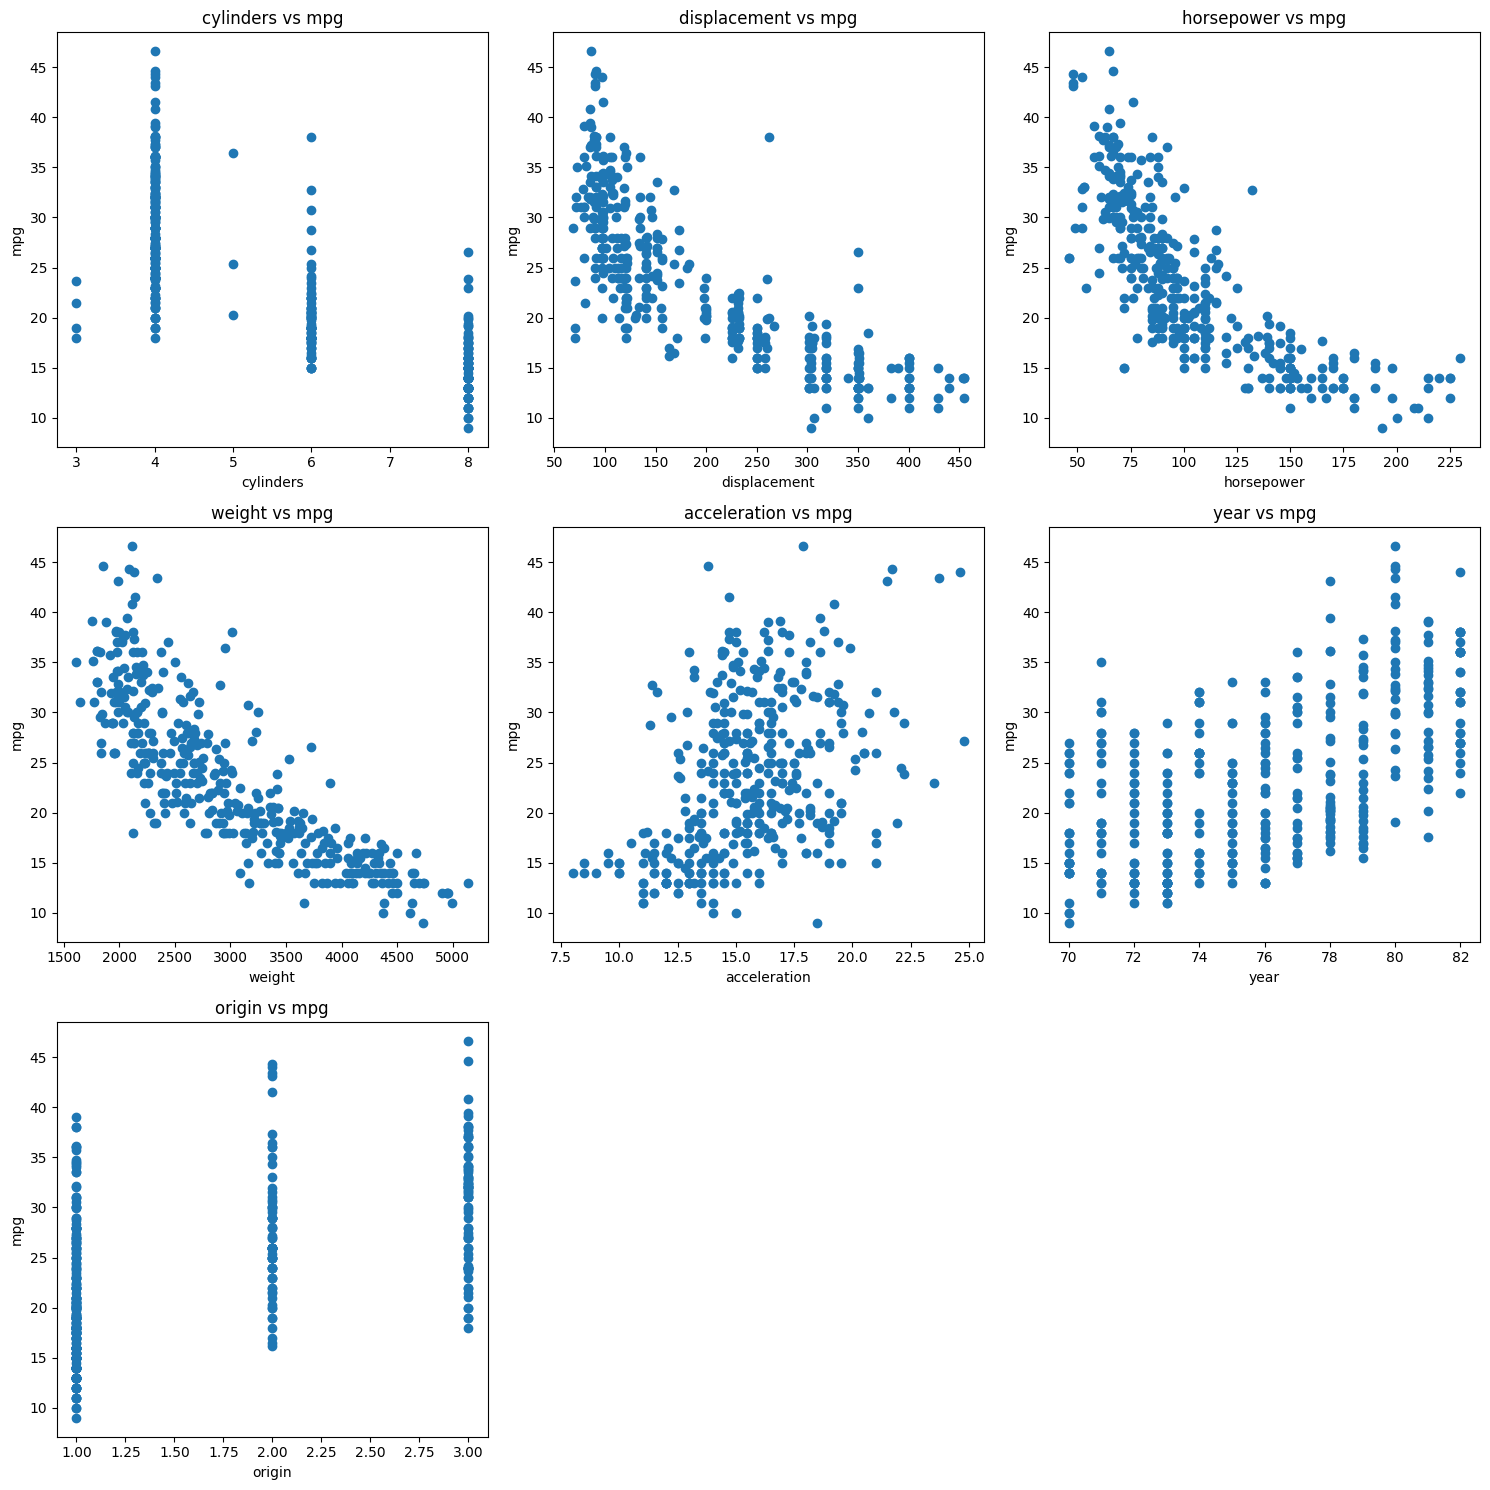

In [130]:
import matplotlib.pyplot as plt

# Define the list of columns to plot against 'mpg'
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Set up the figure and axes for subplots (e.g., 3 rows and 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration (since nrows and ncols could be more than 1)
axes = axes.flatten()

# Loop through each column and create scatter plots on each subplot
for i, col in enumerate(columns):
    axes[i].scatter(auto[col], auto['mpg'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('mpg')
    axes[i].set_title(f'{col} vs mpg')

# Remove any unused subplots if we have more subplots than columns
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined plot
plt.show()

We see already that 'cylinders' and 'origin' aren't any good.

horsepower, weight are logarithmic and acceleration is exponential.

In [131]:
# Transform horsepower and weight to log scale
auto['horsepower_log'] = np.log(auto['horsepower'])
auto['weight_log'] = np.log(auto['weight'])

# Transform acceleration to square root scale
auto['acceleration_sqrt'] = np.sqrt(auto['acceleration'])

## 3.

Perform a linear regression using the OLS function from the statsmodels package. Use 'horsepower' as feature and regress the value 'mpg'. It is a good idea to look up the statsmodels documentation on OLS, to understand how to use it. Further, plot the results including your regression line.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          6.02e-102
Time:                        10:00:04   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

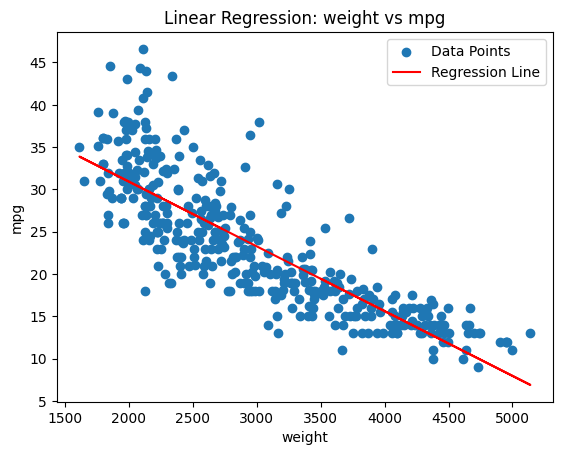

In [132]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'auto' is the DataFrame already loaded with data.
# If 'horsepower' has been cleaned from the '?' values as described before:

# Add a constant to the 'horsepower' column (for the intercept in the regression)
X = sm.add_constant(auto['weight'])

# Define the dependent variable (mpg)
y = auto['mpg']

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the regression summary to understand the results
print(model.summary())

# Predict the values based on the OLS model
predictions = model.predict(X)

# Plot the actual data
plt.scatter(auto['weight'], auto['mpg'], label='Data Points')

# Plot the regression line
plt.plot(auto['weight'], predictions, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('Linear Regression: weight vs mpg')
plt.legend()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     967.3
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          1.16e-107
Time:                        10:00:04   Log-Likelihood:                -1116.8
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     390   BIC:                             2245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        209.9433      6.000     34.990      0.0

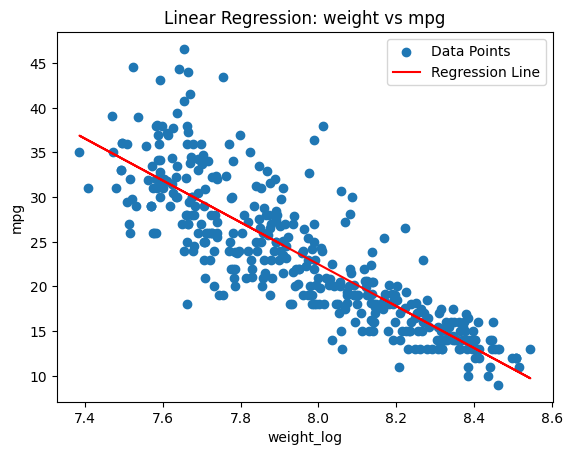

In [133]:
# Add a constant to the 'horsepower' column (for the intercept in the regression)
X = sm.add_constant(auto['weight_log'])

# Define the dependent variable (mpg)
y = auto['mpg']

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the regression summary to understand the results
print(model.summary())

# Predict the values based on the OLS model
predictions = model.predict(X)

# Plot the actual data
plt.scatter(auto['weight_log'], auto['mpg'], label='Data Points')

# Plot the regression line
plt.plot(auto['weight_log'], predictions, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('weight_log')
plt.ylabel('mpg')
plt.title('Linear Regression: weight vs mpg')
plt.legend()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     88.81
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           3.92e-19
Time:                        10:00:04   Log-Likelihood:                -1321.0
No. Observations:                 392   AIC:                             2646.
Df Residuals:                     390   BIC:                             2654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -14.1773      4.00

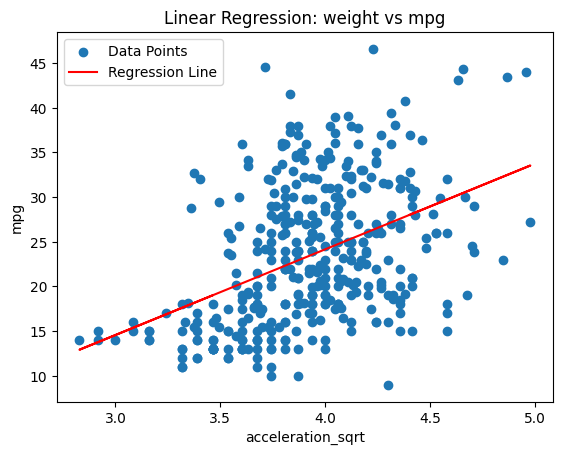

In [134]:
# Add a constant to the 'horsepower' column (for the intercept in the regression)
X = sm.add_constant(auto['acceleration_sqrt'])

# Define the dependent variable (mpg)
y = auto['mpg']

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the regression summary to understand the results
print(model.summary())

# Predict the values based on the OLS model
predictions = model.predict(X)

# Plot the actual data
plt.scatter(auto['acceleration_sqrt'], auto['mpg'], label='Data Points')

# Plot the regression line
plt.plot(auto['acceleration_sqrt'], predictions, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('acceleration_sqrt')
plt.ylabel('mpg')
plt.title('Linear Regression: weight vs mpg')
plt.legend()

# Show the plot
plt.show()

## 4.
Now extend the model using all features. How would you determine which features are important and which aren't? Try to find a good selection of features for your model.

### a. Include all features

In [135]:
import statsmodels.api as sm
import pandas as pd

# Select all numerical columns except 'mpg' and 'name' (which is non-numeric)
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]

# Add a constant to include an intercept in the model
X = sm.add_constant(X)

# Define the dependent variable (mpg)
y = auto['mpg']

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the summary to check p-values and other statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          2.04e-139
Time:                        10:00:04   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [136]:
import statsmodels.api as sm
import pandas as pd

# Select all numerical columns except 'mpg' and 'name' (which is non-numeric)
X = auto[['cylinders', 'displacement', 'horsepower_log', 'weight_log', 'acceleration_sqrt', 'year', 'origin']]

# Add a constant to include an intercept in the model
X = sm.add_constant(X)

# Define the dependent variable (mpg)
y = auto['mpg']

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the summary to check p-values and other statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     316.5
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          3.61e-155
Time:                        10:00:04   Log-Likelihood:                -986.36
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     384   BIC:                             2020.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               132.1513     10.82

### b. Check Feature Importance Using P-values:
- Low p-value (< 0.05): feature is statistically significant and likely important for predicting mpg.
- High p-value (> 0.05): feature is not statistically significant and may not contribute much to the model.

Remove those with high p-values

In [137]:
# Loop through and remove features with high p-values one by one
p_max = 0.05
while True:
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    if p_values.max() > p_max:
        # Drop the feature with the highest p-value
        excluded_feature = p_values.idxmax()
        X = X.drop(columns=[excluded_feature])
    else:
        break

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     439.1
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          8.39e-157
Time:                        10:00:04   Log-Likelihood:                -988.73
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     386   BIC:                             2013.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            133.7872     10.829     12.